In [169]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

In [132]:
df = pd.read_csv('/content/drive/MyDrive/datasets/house-prices.csv')
df = df.drop(columns=['Neighborhood', 'Home'])
df.Brick = df.Brick.map({'Yes': 1, 'No': 0})
df.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick
0,114300,1790,2,2,2,0
1,114200,2030,4,2,3,0
2,114800,1740,3,2,1,0
3,94700,1980,3,2,3,0
4,119800,2130,3,3,3,0


In [133]:
df.shape

(128, 6)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Price      128 non-null    int64
 1   SqFt       128 non-null    int64
 2   Bedrooms   128 non-null    int64
 3   Bathrooms  128 non-null    int64
 4   Offers     128 non-null    int64
 5   Brick      128 non-null    int64
dtypes: int64(6)
memory usage: 6.1 KB


In [135]:
df.describe()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,130427.343750,2000.937500,3.023438,2.445312,2.578125,0.328125
std,26868.770371,211.572431,0.725951,0.514492,1.069324,0.471376
min,69100.000000,1450.000000,2.000000,2.000000,1.000000,0.000000
25%,111325.000000,1880.000000,3.000000,2.000000,2.000000,0.000000
50%,125950.000000,2000.000000,3.000000,2.000000,3.000000,0.000000
75%,148250.000000,2140.000000,3.000000,3.000000,3.000000,1.000000
max,211200.000000,2590.000000,5.000000,4.000000,6.000000,1.000000


In [136]:
df.isnull().sum()

Price        0
SqFt         0
Bedrooms     0
Bathrooms    0
Offers       0
Brick        0
dtype: int64

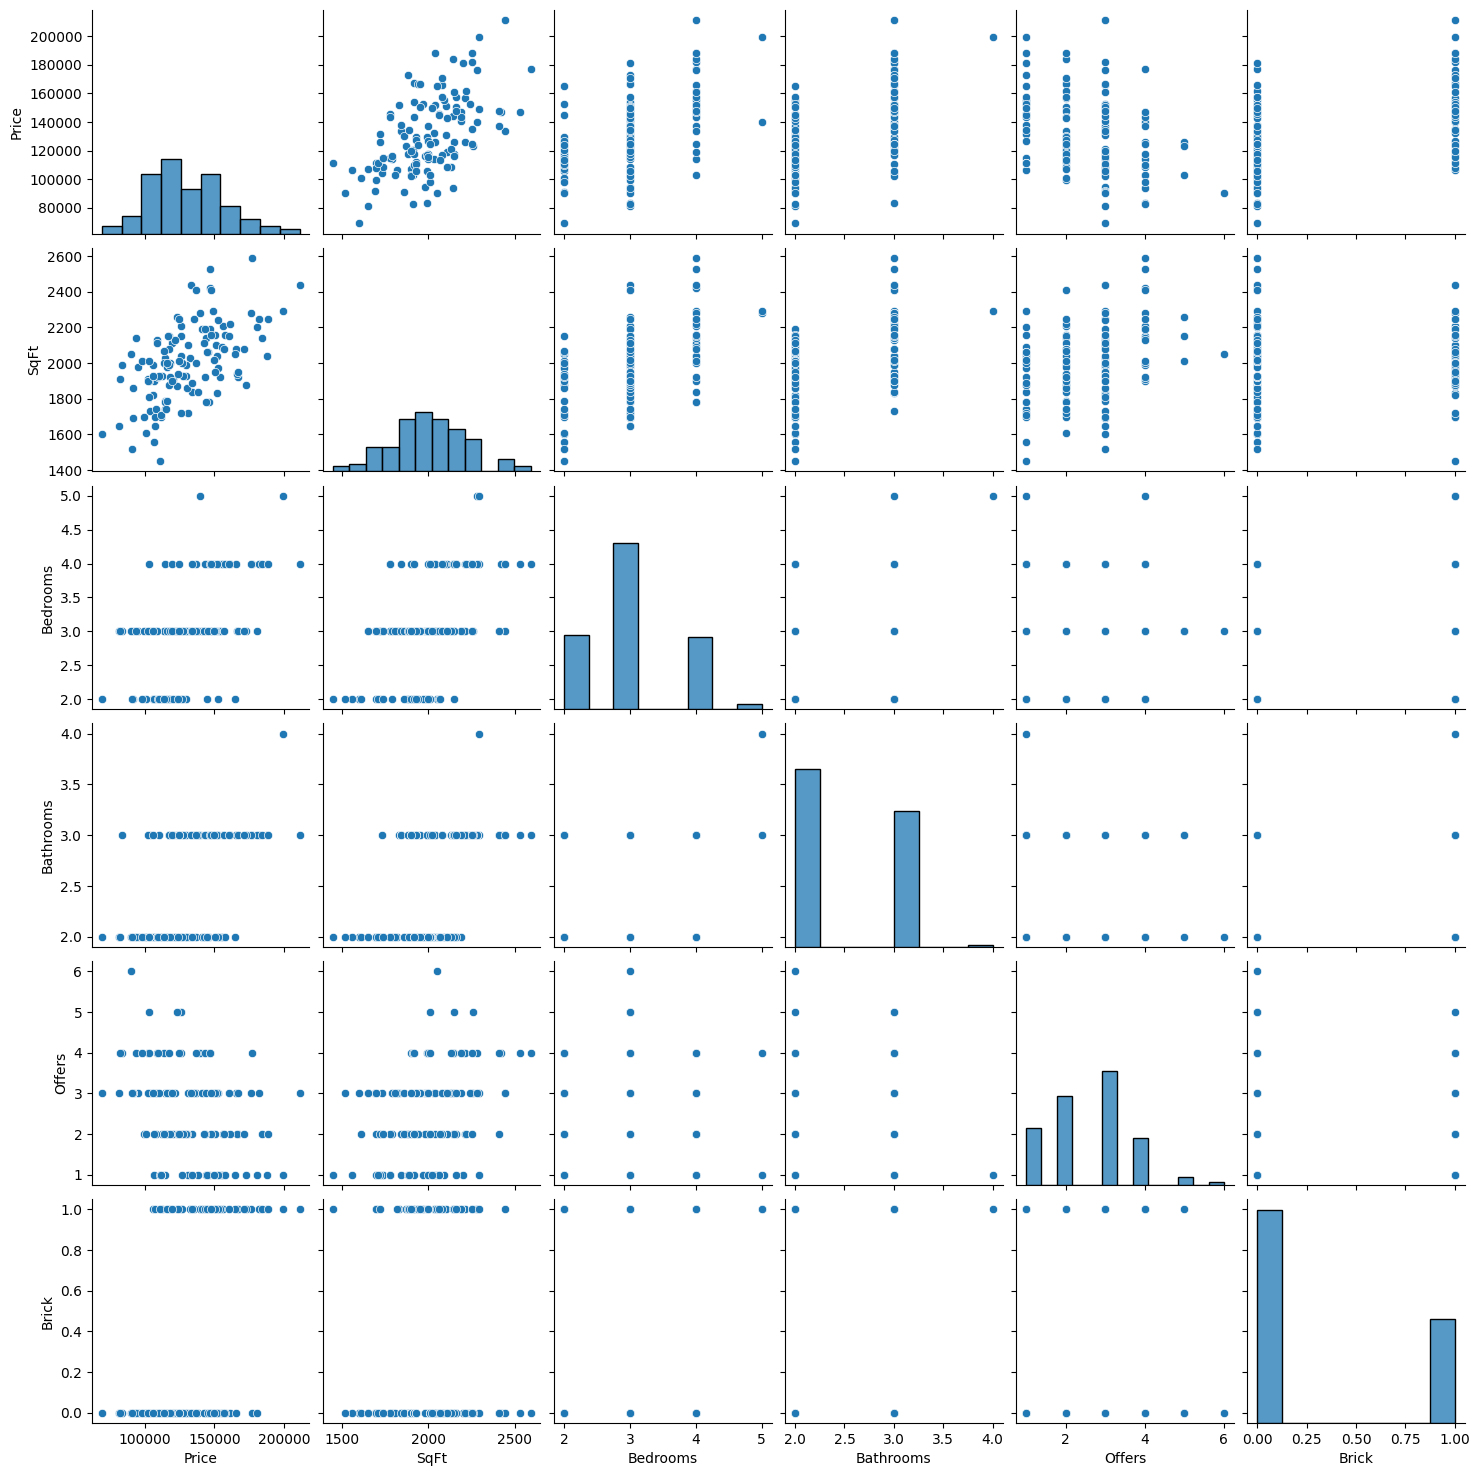

In [137]:
sns.pairplot(df)

In [193]:
np.random.seed(12)

df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3)
actual_price = df_test.loc[40]['Price']
df_test = df_test.drop(columns=['Price'])

y_train = df_train.pop('Price')
x_train = df_train

In [194]:
import warnings
warnings.filterwarnings('ignore')

In [195]:
model = LinearRegression()
model.fit(x_train, y_train)

test_house = np.array(df_test.loc[40]).reshape(1, -1)
predicted = model.predict(test_house)

print(f'Predicted price is {predicted[0]:.4f}')
print(f'Actual price is {actual_price:.4f}')

Predicted price is 103014.6666
Actual price is 106600.0000
